# Importing data

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import pygal 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import SVG, HTML
pd.set_option('display.max_columns', None)

In [2]:
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

In [3]:
Attributes = ["Erythema" , "Scaling", "Sefinite borders", "Itching", "Koebner phenomenon", "Polygonal papules",
              "Follicular papules", "Oral mucosal_involvement", "Knee elbow involvement", "Scalp involvement",
              "Family history", "Melanin incontinence", "Eosinophils in the infiltrate", "PNL infiltrate",
              "Fibrosis of the papillary dermis", "Exocytosis", "acanthosis", "Hyperkeratosis", "Parakeratosis",
              "Clubbing of the rete ridges", "Elongation of the rete ridges",
              "Thinning of the suprapapillary epidermis", "Spongiform pustule", "Munro microabcess",
              "Focal hypergranulosis", "Disappearance of the granular layer", 
              "Vacuolisation and damage of basal layer", "Spongiosis", "Saw-tooth appearance of retes",
              "Follicular horn plug", "Perifollicular parakeratosis", "Inflammatory monoluclear inflitrate",
              "Band-like infiltrate", "Age", "Class"]
classes = ["Psoriasis", "Seboreic dermatitis", "Lichen planus", "Pityriasis rosea", "Cronic dermatitis",
           "Pityriasis rubra pilaris"]

df_raw = pd.read_csv('dermatology.data',header=None, names = Attributes)

In [4]:
df_raw.head(10)

,Erythema,Scaling,Sefinite borders,Itching,Koebner phenomenon,Polygonal papules,Follicular papules,Oral mucosal_involvement,Knee elbow involvement,Scalp involvement,Family history,Melanin incontinence,Eosinophils in the infiltrate,PNL infiltrate,Fibrosis of the papillary dermis,Exocytosis,acanthosis,Hyperkeratosis,Parakeratosis,Clubbing of the rete ridges,Elongation of the rete ridges,Thinning of the suprapapillary epidermis,Spongiform pustule,Munro microabcess,Focal hypergranulosis,Disappearance of the granular layer,Vacuolisation and damage of basal layer,Spongiosis,Saw-tooth appearance of retes,Follicular horn plug,Perifollicular parakeratosis,Inflammatory monoluclear inflitrate,Band-like infiltrate,Age,Class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3
5,2,3,2,0,0,0,0,0,0,0,0,0,2,1,0,2,2,0,2,0,0,0,1,0,0,0,0,2,0,0,0,1,0,41,2
6,2,1,0,2,0,0,0,0,0,0,0,0,0,0,3,1,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,18,5
7,2,2,3,3,3,3,0,2,0,0,0,2,0,0,0,2,3,0,0,0,0,0,0,0,0,2,2,3,2,0,0,3,3,57,3
8,2,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,22,4
9,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,3,2,0,2,0,0,0,0,0,0,0,0,2,0,0,0,2,0,30,4


In [5]:
df_raw["Age"].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [6]:
df_raw[df_raw["Age"] =='?']

,Erythema,Scaling,Sefinite borders,Itching,Koebner phenomenon,Polygonal papules,Follicular papules,Oral mucosal_involvement,Knee elbow involvement,Scalp involvement,Family history,Melanin incontinence,Eosinophils in the infiltrate,PNL infiltrate,Fibrosis of the papillary dermis,Exocytosis,acanthosis,Hyperkeratosis,Parakeratosis,Clubbing of the rete ridges,Elongation of the rete ridges,Thinning of the suprapapillary epidermis,Spongiform pustule,Munro microabcess,Focal hypergranulosis,Disappearance of the granular layer,Vacuolisation and damage of basal layer,Spongiosis,Saw-tooth appearance of retes,Follicular horn plug,Perifollicular parakeratosis,Inflammatory monoluclear inflitrate,Band-like infiltrate,Age,Class
33,2,2,1,0,0,0,0,0,1,0,1,0,0,2,0,0,2,1,2,2,1,2,0,1,0,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,1,1,0,0,0,2,1,1,2,0,0,0,0,0,1,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,3,2,2,1,3,0,0,0,0,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,0,0,0,0,3,2,3,1,2,2,2,0,0,0,0,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,0,0,0,0,3,2,3,2,1,1,3,0,0,0,0,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,0,0,0,0,2,1,3,1,1,0,2,0,1,0,0,0,0,2,0,0,0,3,0,?,5


In [7]:
df_raw = df_raw.replace('?', np.nan)
df_raw["Age"] = pd.to_numeric(df_raw["Age"], downcast='signed')

In [8]:
df_raw.isnull().sum()

Erythema                                    0
Scaling                                     0
Sefinite borders                            0
Itching                                     0
Koebner phenomenon                          0
Polygonal papules                           0
Follicular papules                          0
Oral mucosal_involvement                    0
Knee elbow involvement                      0
Scalp involvement                           0
Family history                              0
Melanin incontinence                        0
Eosinophils in the infiltrate               0
PNL infiltrate                              0
Fibrosis of the papillary dermis            0
Exocytosis                                  0
acanthosis                                  0
Hyperkeratosis                              0
Parakeratosis                               0
Clubbing of the rete ridges                 0
Elongation of the rete ridges               0
Thinning of the suprapapillary epi

# Missing-data imputation

In [9]:
df_filled = df_raw
df_filled['Age'] = pd.to_numeric(df_filled['Age'].fillna(df_filled['Age'].median()), downcast='signed')

In [10]:
df_filled.describe()

,Erythema,Scaling,Sefinite borders,Itching,Koebner phenomenon,Polygonal papules,Follicular papules,Oral mucosal_involvement,Knee elbow involvement,Scalp involvement,Family history,Melanin incontinence,Eosinophils in the infiltrate,PNL infiltrate,Fibrosis of the papillary dermis,Exocytosis,acanthosis,Hyperkeratosis,Parakeratosis,Clubbing of the rete ridges,Elongation of the rete ridges,Thinning of the suprapapillary epidermis,Spongiform pustule,Munro microabcess,Focal hypergranulosis,Disappearance of the granular layer,Vacuolisation and damage of basal layer,Spongiosis,Saw-tooth appearance of retes,Follicular horn plug,Perifollicular parakeratosis,Inflammatory monoluclear inflitrate,Band-like infiltrate,Age,Class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.267760,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.156875,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


# Explanatory visualizations

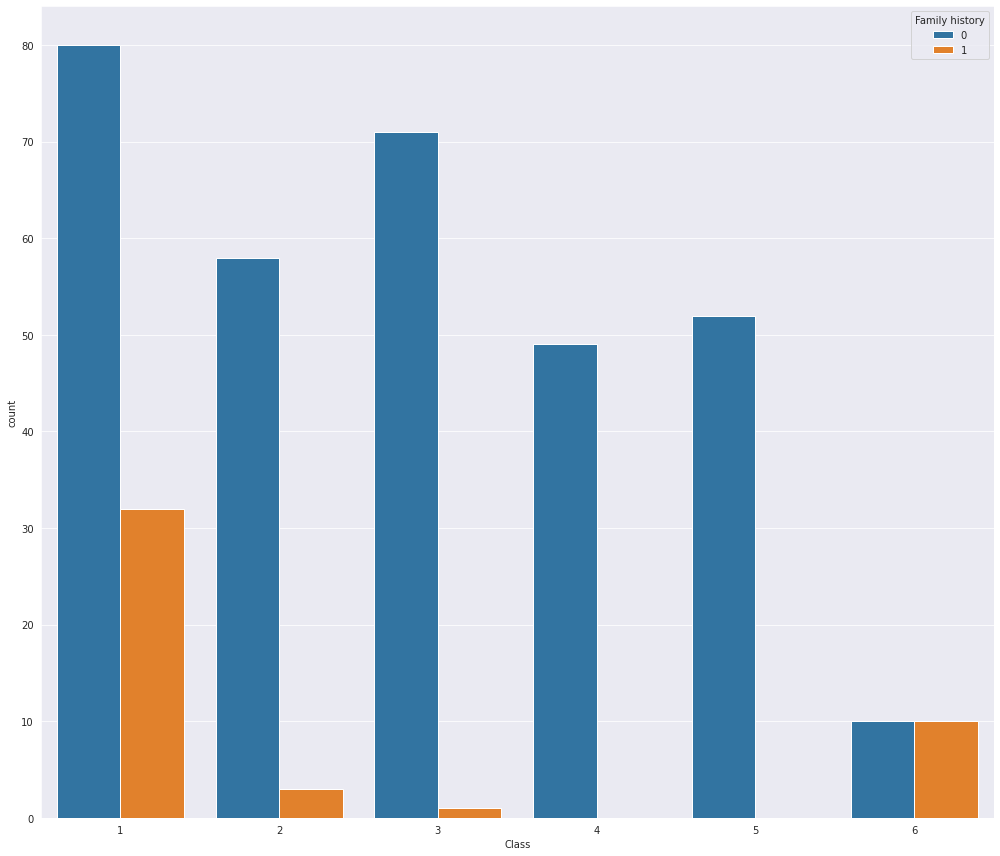

In [11]:
plt.figure(figsize=(14,12)) 
ax = sns.countplot(x='Class',hue="Family history", data=df_filled)
plt.tight_layout()

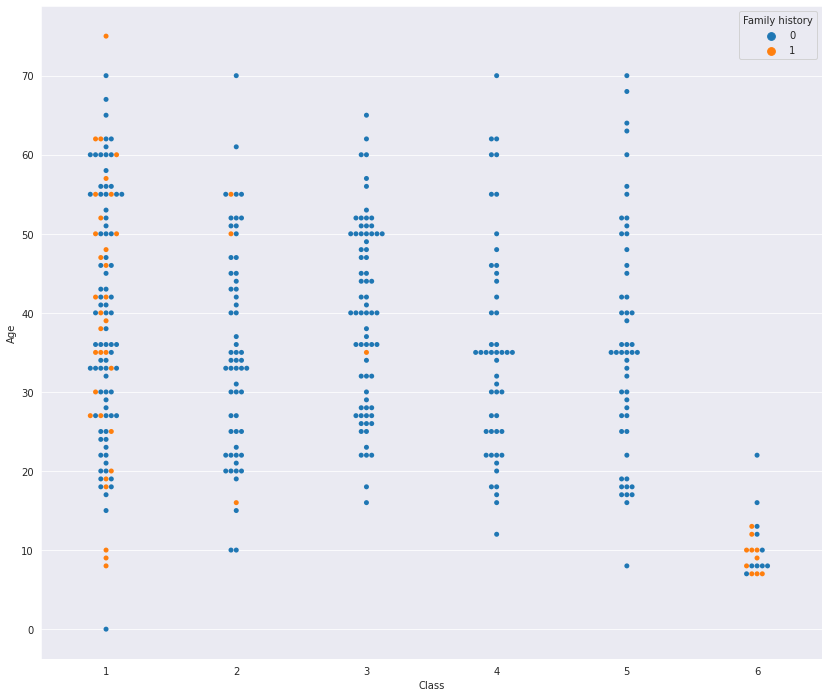

In [12]:
plt.figure(figsize=(14,12)) 
sns.swarmplot(x="Class", y="Age",hue="Family history", data=df_filled);

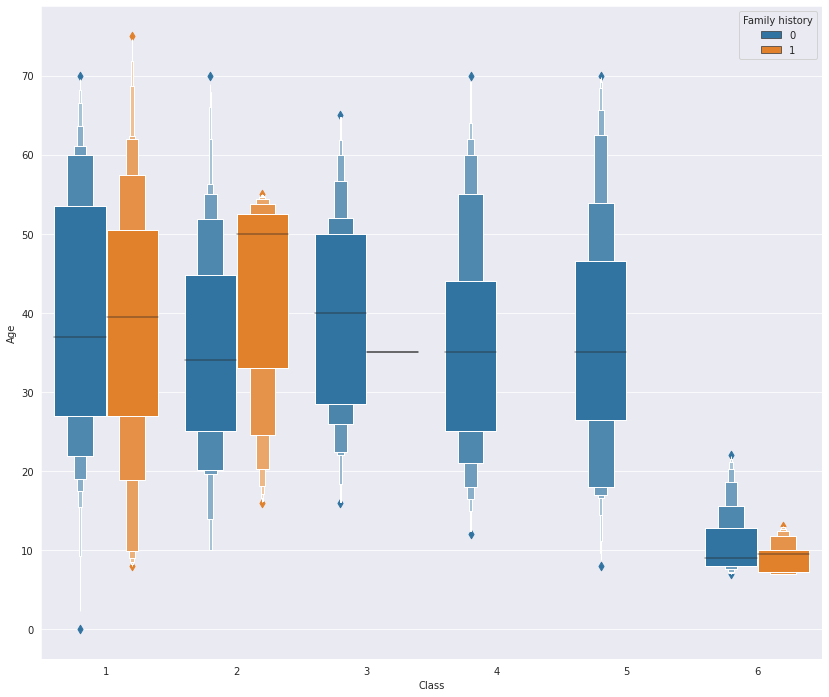

In [13]:
plt.figure(figsize=(14,12)) 
ax = sns.lvplot(x='Class',y = 'Age', hue="Family history", data=df_filled)

In [16]:
unique_class = sorted(df_raw["Class"].unique())
unique_age = sorted(df_raw["Age"].unique())
df_percent= pd.DataFrame(columns=unique_class)

for i in unique_class:
    sub_list ={}
    value_dict = df_raw[df_raw['Class']==i][['Age', 'Class']].groupby('Age')['Class'].value_counts()
    pd.concat([value_dict,value_dict], ignore_index=True, axis=1)
    df_percent[i] = value_dict
df = pd.DataFrame.from_dict(df_percent)
df = df/len(df_filled)

In [14]:
new_series = df_filled[df_filled['Class']==1][['Age', 'Class']].groupby('Age')['Age'].value_counts()
new_series2 = df_filled[df_filled['Class']==2][['Age', 'Class']].groupby('Age')['Age'].value_counts()
new_series3 = df_filled[df_filled['Class']==3][['Age', 'Class']].groupby('Age')['Age'].value_counts()
new_series4 = df_filled[df_filled['Class']==4][['Age', 'Class']].groupby('Age')['Age'].value_counts()
new_series5 = df_filled[df_filled['Class']==5][['Age', 'Class']].groupby('Age')['Age'].value_counts()
new_series6 = df_filled[df_filled['Class']==6][['Age', 'Class']].groupby('Age')['Age'].value_counts()
new_df = pd.concat([new_series, new_series2, new_series3, new_series4, new_series5,
                    new_series4], ignore_index=True, axis=1).transpose()
new_df.columns = new_df.columns.droplevel()
new_df = new_df.fillna(0)

In [15]:
new_df.columns = new_df.columns.astype('int')

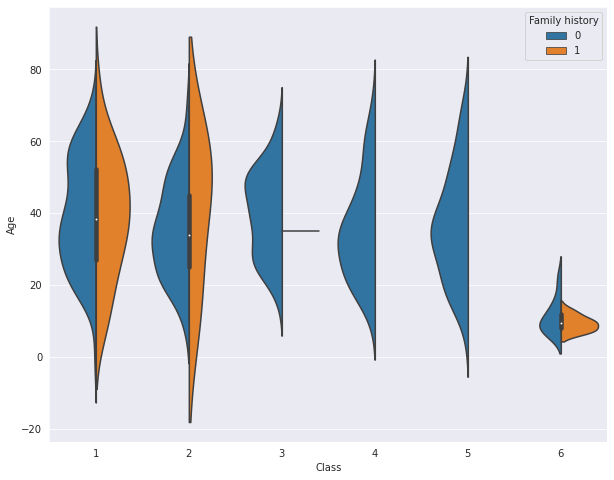

In [16]:
plt.figure(figsize=(10,8)) 
sns.violinplot(x="Class", y="Age",hue="Family history", data=df_filled, split=True);

In [17]:
from pygal.style import DefaultStyle
line_chart = pygal.StackedLine(fill=True,x_label_rotation=45, style=DefaultStyle)
line_chart.title = 'Different Diseases in age disstribution '
line_chart.x_labels = map(str, new_df.columns)
line_chart.human_readable = True
line_chart.add('1', new_df.iloc[0,:])
line_chart.add('2', new_df.iloc[1,:])
line_chart.add('3', new_df.iloc[2,:])
line_chart.add('4', new_df.iloc[3,:])
line_chart.add('5', new_df.iloc[4,:])
line_chart.add('6', new_df.iloc[5,:])
HTML(html_pygal.format(pygal_render=line_chart.render(is_unicode=True)))

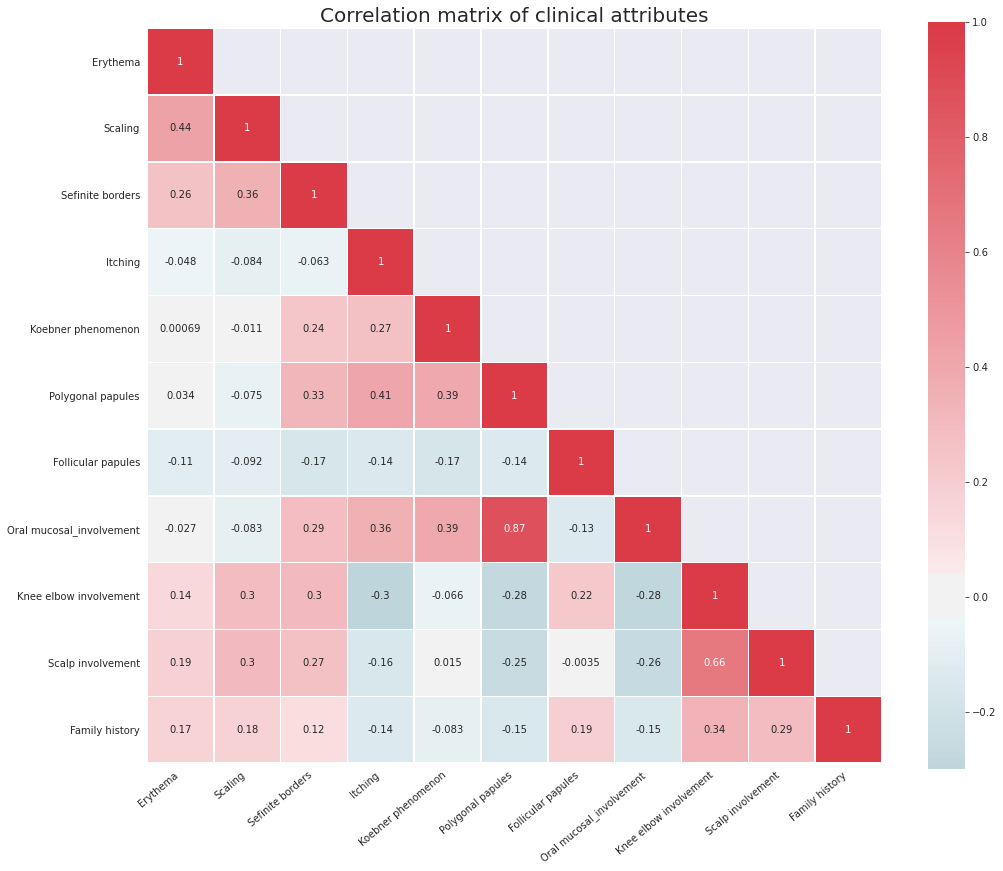

In [18]:
corr = df_filled.iloc[:,:11].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Correlation matrix of clinical attributes', fontsize=20)
plt.tight_layout()

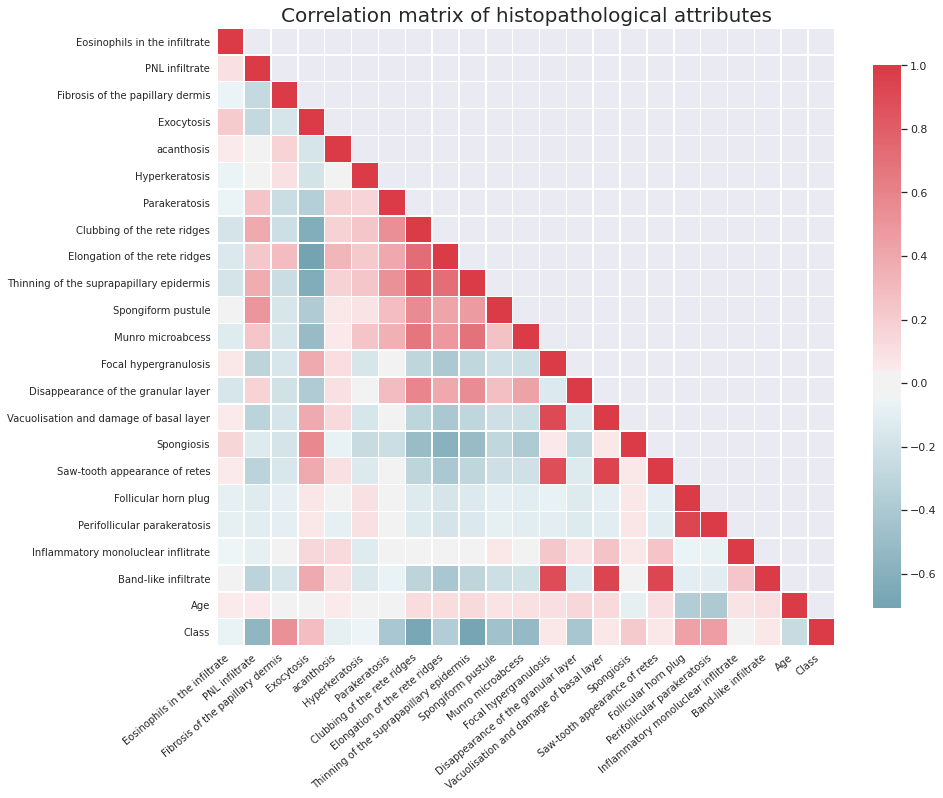

In [19]:
corr = df_filled.iloc[:,12:].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(font_scale=1)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Correlation matrix of histopathological attributes', fontsize=20)
plt.tight_layout()

In [20]:
df_percent = {}
for i in Attributes[:10]:
    df_percent[i] = pd.value_counts(df_filled[i].values, sort=False).tolist()
df = pd.DataFrame.from_dict(df_percent)
df = df/len(df_filled)

In [84]:
line_chart  = pygal.StackedBar(x_label_rotation=45)                                   
line_chart .title = 'Clinical feature degree (in %)'
line_chart .x_labels = Attributes[:10]
line_chart .add('0', df.iloc[0,:]) 
line_chart .add('1', df.iloc[1,:]) 
line_chart .add('2', df.iloc[2,:]) 
line_chart .add('3', df.iloc[3,:])  
HTML(html_pygal.format(pygal_render=line_chart .render(is_unicode=True)))

In [21]:
df_percent = {}
for i in Attributes[11:-2]:
    sub_list =[0,0,0,0]
    value_dict = pd.value_counts(df_filled[i].values, sort=False).to_dict()
    for idx, key in value_dict.items():
        sub_list[idx] =key
    df_percent[i] = sub_list
df = pd.DataFrame.from_dict(df_percent)
df = df/len(df_filled)

line_chart  = pygal.StackedBar(x_label_rotation=45)                                   
line_chart .title = 'Histopathological attributes degree (in %)'
line_chart .x_labels = Attributes[11:-2]
line_chart .add('0', df.iloc[0,:]) 
line_chart .add('1', df.iloc[1,:]) 
line_chart .add('2', df.iloc[2,:]) 
line_chart .add('3', df.iloc[3,:])  
HTML(html_pygal.format(pygal_render=line_chart .render(is_unicode=True)))

# SVM

In [13]:
#Splitting the data into features and targets
X = df_raw.iloc[:,:34].values
y = df_raw.iloc[:,-1].values
X

array([[ 2,  2,  0, ...,  1,  0, 55],
       [ 3,  3,  3, ...,  1,  0,  8],
       [ 2,  1,  2, ...,  2,  3, 26],
       ...,
       [ 3,  2,  2, ...,  2,  3, 28],
       [ 2,  1,  3, ...,  2,  3, 50],
       [ 3,  2,  2, ...,  3,  0, 35]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [15]:
#Applying future scaling
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [16]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [17]:
y_pred = clf.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9891304347826086

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[21,  0,  0,  0,  0,  0],
       [ 0, 15,  0,  1,  0,  0],
       [ 0,  0, 19,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0, 12,  0],
       [ 0,  0,  0,  0,  0,  8]])

In [20]:
X_train.shape

(274, 34)

In [21]:
X_test.shape

(92, 34)

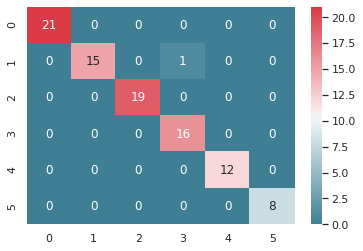

In [69]:
sns.heatmap(cm, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, n_estimators=30)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30, random_state=0)

In [44]:
y_pred = clf.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9490909090909091

In [46]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[81,  0,  0,  0,  0,  0],
       [ 2, 43,  0,  0,  4,  0],
       [ 0,  0, 52,  0,  0,  0],
       [ 0,  6,  0, 34,  0,  0],
       [ 0,  0,  0,  0, 38,  0],
       [ 2,  0,  0,  0,  0, 13]])

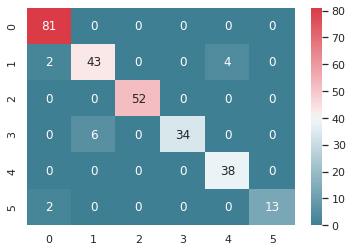

In [47]:
sns.heatmap(cm, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)